In [1]:
import pandas as pd
df = pd.read_csv("/teamspace/studios/this_studio/Kaggle_Competitions/fertilizer_prediction/data/train.csv")
df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


# Exploratory Data Analysis

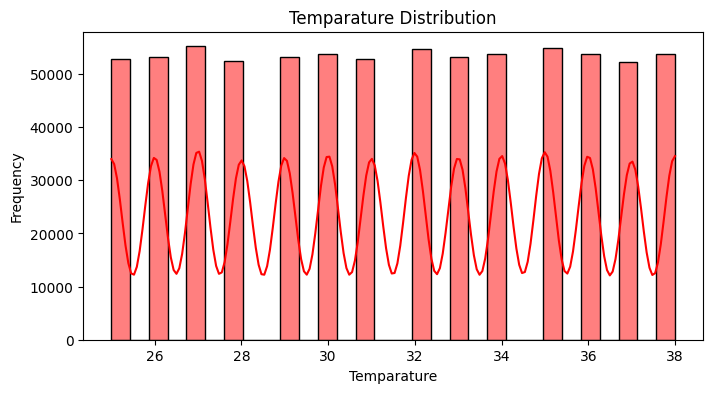

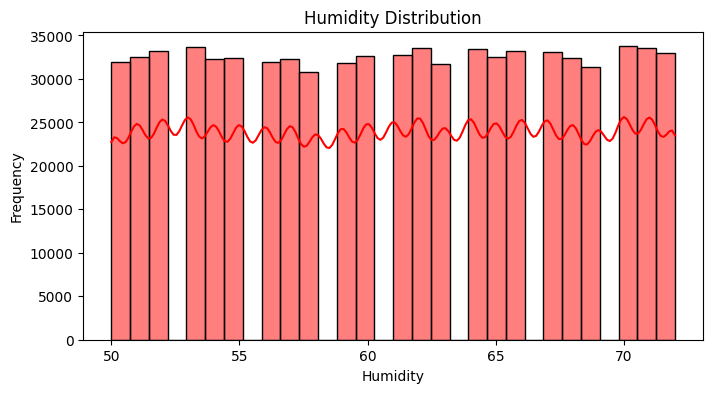

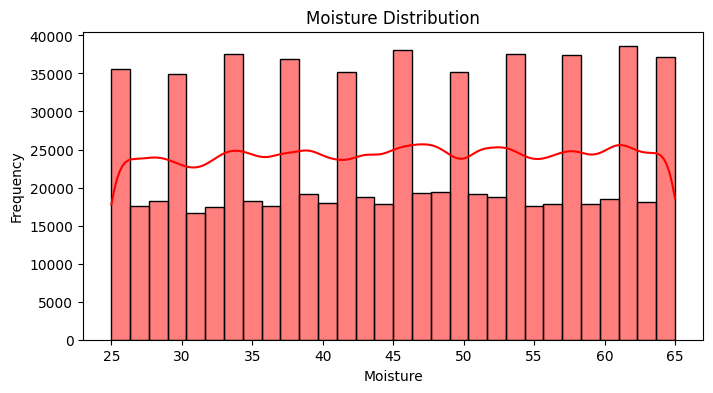

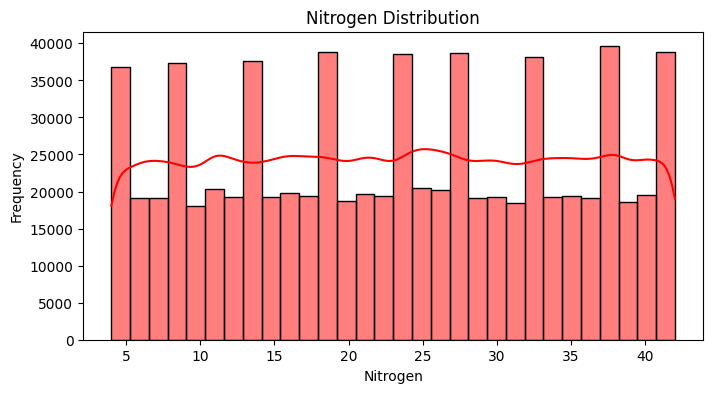

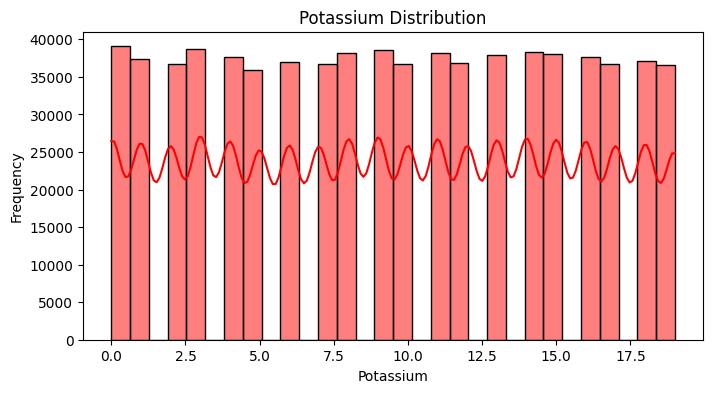

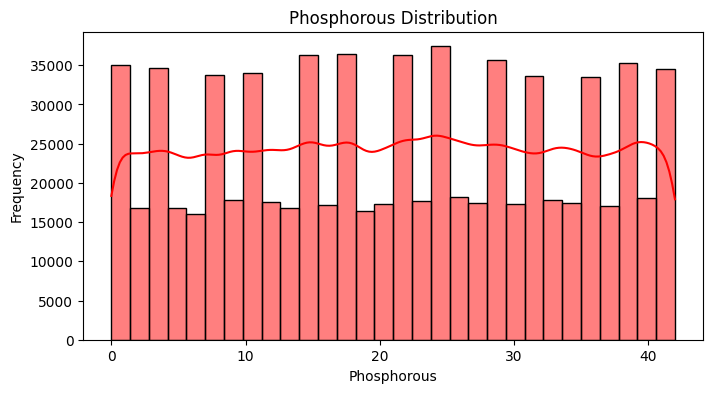

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='red')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


/tmp/ipykernel_3156/3247208327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


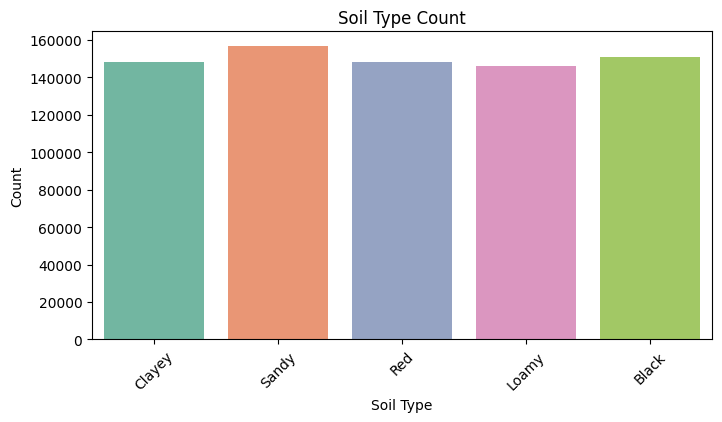

/tmp/ipykernel_3156/3247208327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


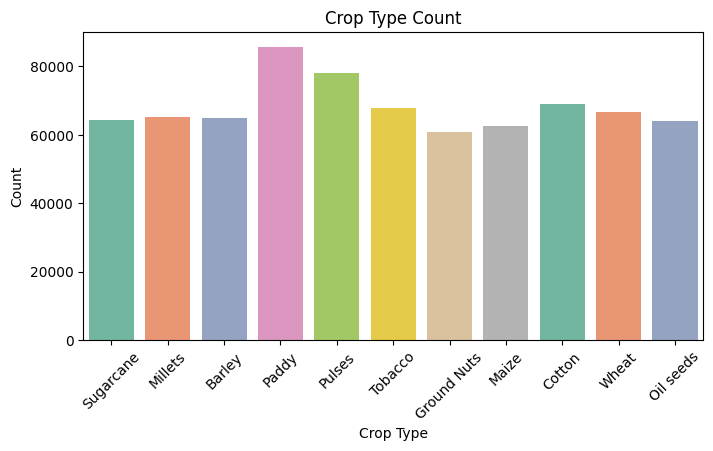

/tmp/ipykernel_3156/3247208327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


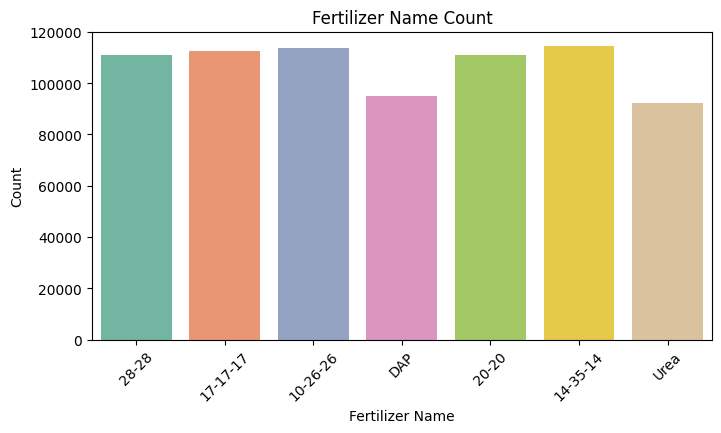

In [4]:
cat_cols = ['Soil Type', 'Crop Type', 'Fertilizer Name']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


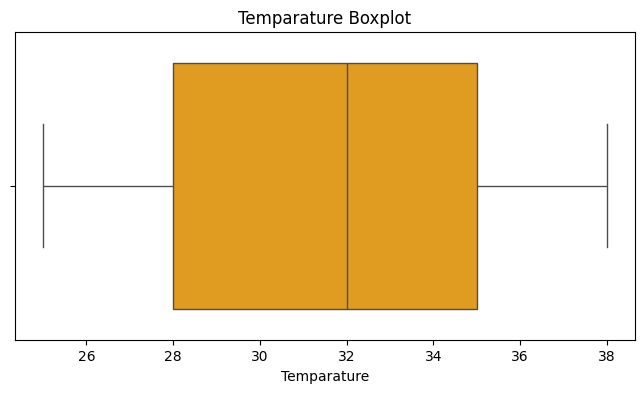

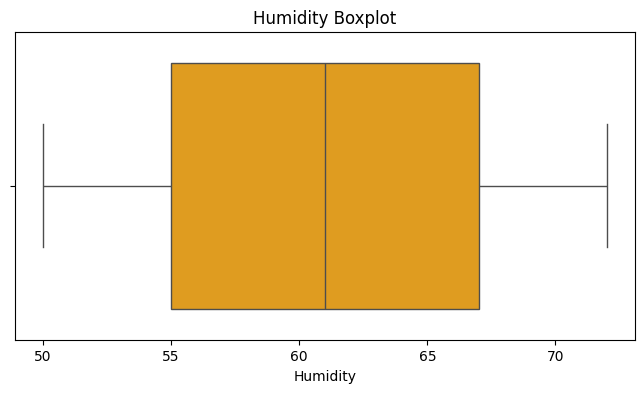

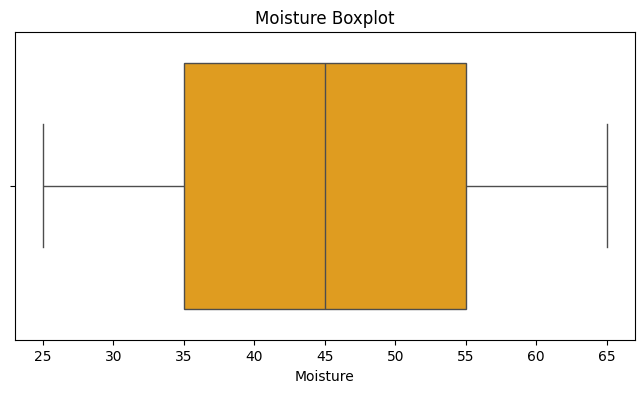

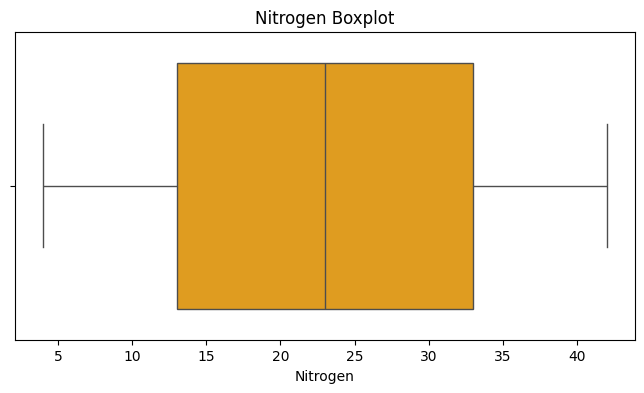

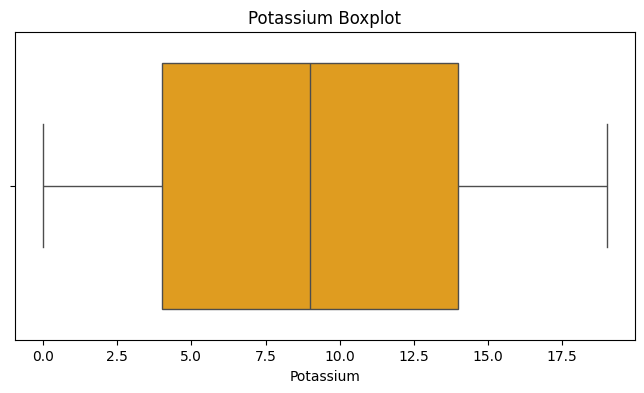

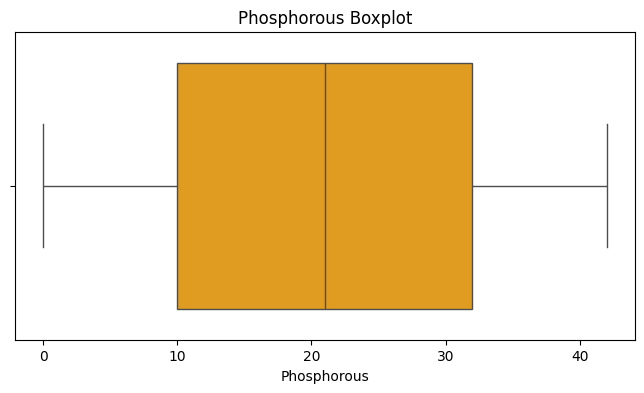

In [5]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)
    plt.show()


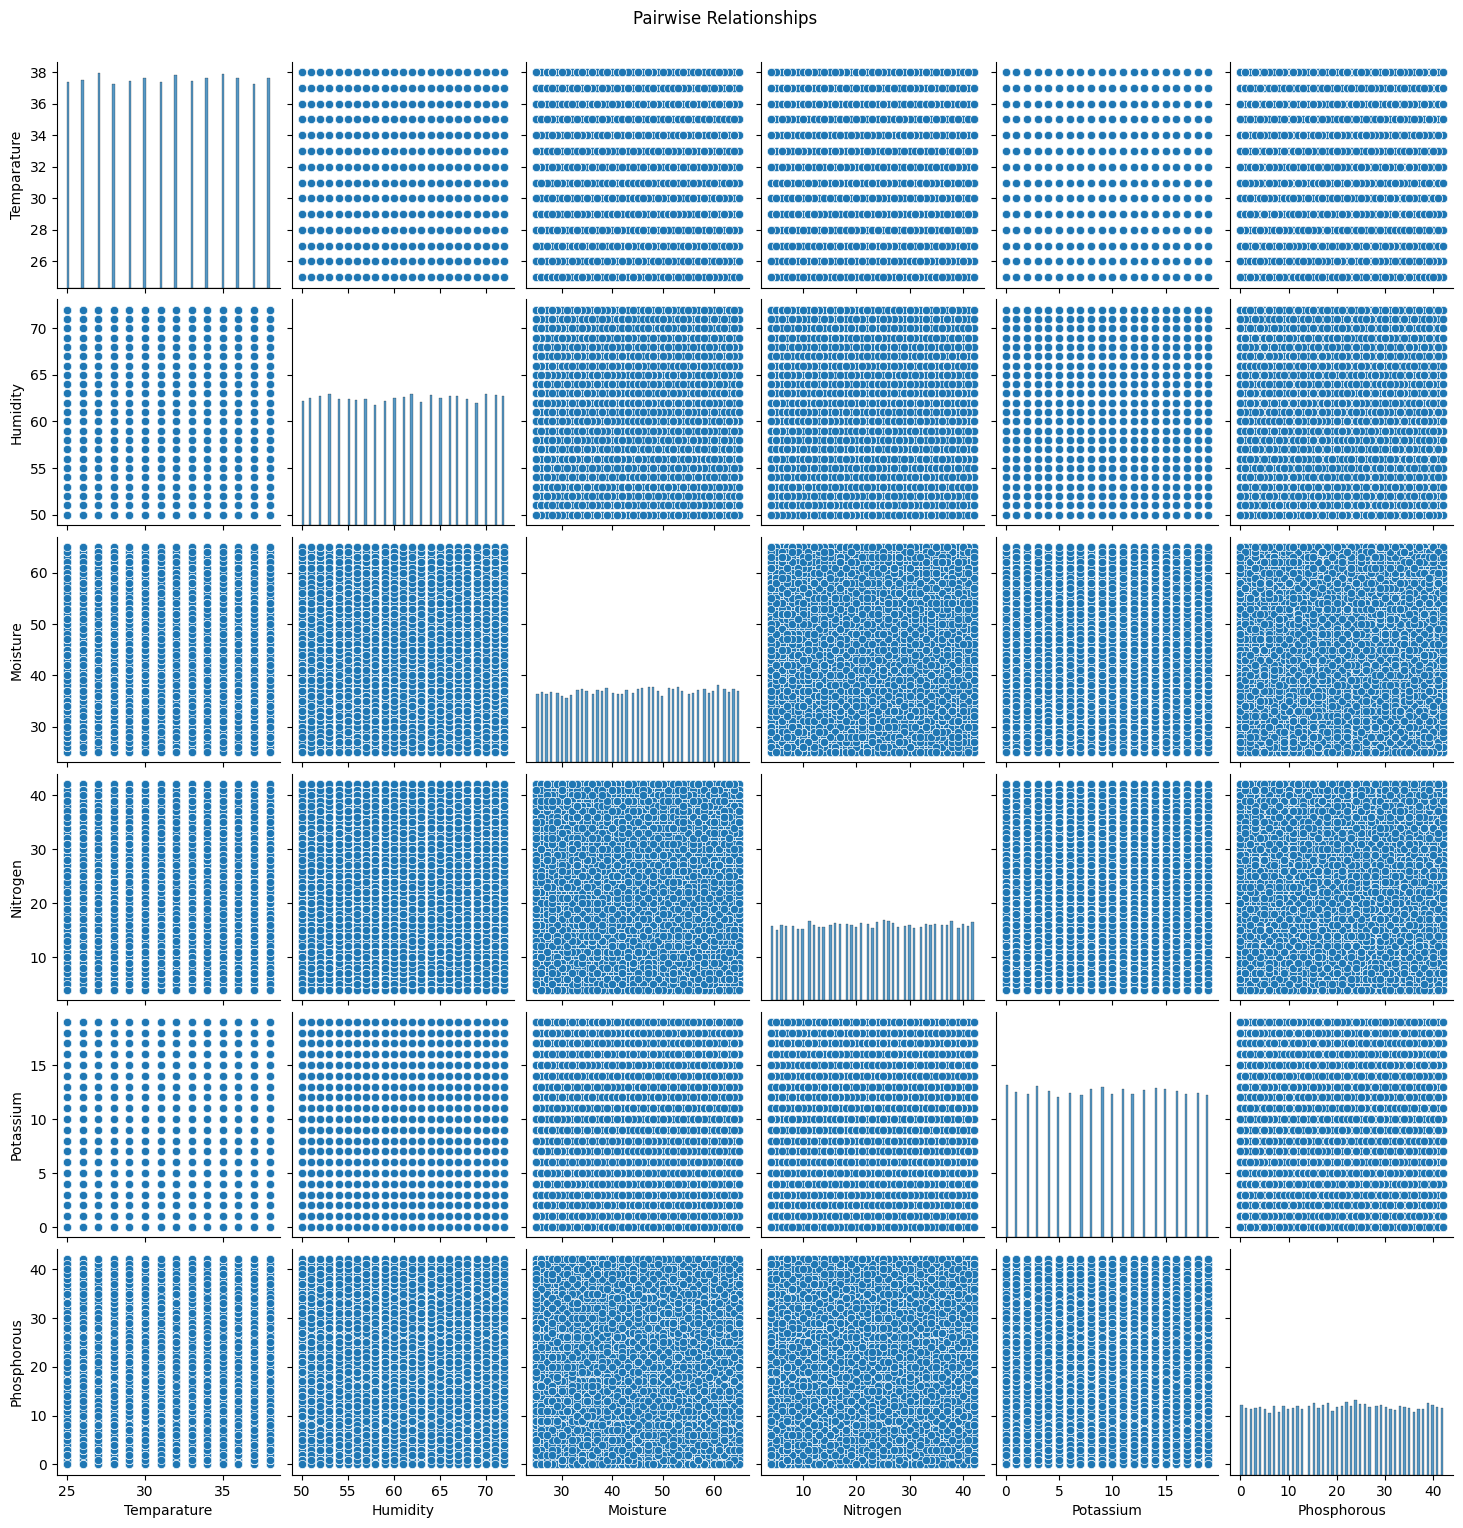

In [6]:
sns.pairplot(df[num_cols].dropna())
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


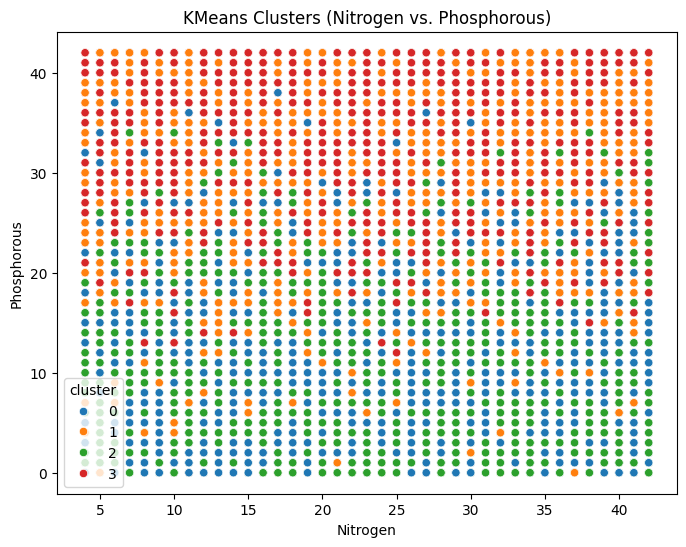

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[num_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Nitrogen'], y=df['Phosphorous'], hue=df['cluster'], palette='tab10')
plt.title('KMeans Clusters (Nitrogen vs. Phosphorous)')
plt.show()


In [1]:
from feature_engineering import fertilizer_feature_engineering
import pandas as pd

train_df = pd.read_csv("/teamspace/studios/this_studio/Kaggle_Competitions/fertilizer_prediction/data/train.csv")
test_df = pd.read_csv("/teamspace/studios/this_studio/Kaggle_Competitions/fertilizer_prediction/data/test.csv")

train_df_featured = fertilizer_feature_engineering(train_df)
test_df_featured = fertilizer_feature_engineering(test_df)

In [2]:
# Automatic column type detection
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [3]:
target_col = "Fertilizer Name"
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

if target_col in categorical_cols:
    categorical_cols.remove(target_col)

In [4]:
from encoding_and_scaling import auto_preprocess_data
X_train, y_train, X_test, label_encoder = auto_preprocess_data(train_df_featured, test_df_featured)

In [5]:
from train_and_test import train_and_predict

submission = train_and_predict(X_train, y_train, X_test, test_df["id"].to_numpy(), label_encoder)

2025-06-30 20:47:46.680726: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-30 20:47:46.693791: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751316466.709886   13344 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751316466.714652   13344 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-30 20:47:46.730361: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr


Training Model 1/3

  Fold 1/3 - Model 1


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Model 1 Fold 1:  72%|███████▏  | 36/50 [03:26<01:20,  5.75s/it, train_loss=1.9349, val_loss=1.9372, val_map3=47.40%, status=Early stopping]
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  Fold 1 completed in 209.75 seconds

  Fold 2/3 - Model 1


Model 1 Fold 2:  78%|███████▊  | 39/50 [03:06<00:52,  4.77s/it, train_loss=1.9340, val_loss=1.9373, val_map3=47.38%, status=Early stopping]
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  Fold 2 completed in 186.99 seconds

  Fold 3/3 - Model 1


Model 1 Fold 3:  92%|█████████▏| 46/50 [03:54<00:20,  5.10s/it, train_loss=1.9350, val_loss=1.9378, val_map3=47.34%, status=Early stopping]


  Fold 3 completed in 235.31 seconds

Model 1 completed in 632.29 seconds

Training Model 2/3


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "



  Fold 1/3 - Model 2


Model 2 Fold 1:  70%|███████   | 35/50 [02:48<01:12,  4.81s/it, train_loss=1.9341, val_loss=1.9372, val_map3=47.37%, status=Early stopping]
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  Fold 1 completed in 169.26 seconds

  Fold 2/3 - Model 2


Model 2 Fold 2:  66%|██████▌   | 33/50 [02:44<01:24,  4.98s/it, train_loss=1.9344, val_loss=1.9373, val_map3=47.42%, status=Early stopping]
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  Fold 2 completed in 165.12 seconds

  Fold 3/3 - Model 2


Model 2 Fold 3:  72%|███████▏  | 36/50 [03:07<01:12,  5.21s/it, train_loss=1.9340, val_loss=1.9377, val_map3=47.26%, status=Early stopping]


  Fold 3 completed in 188.32 seconds

Model 2 completed in 522.91 seconds

Training Model 3/3

  Fold 1/3 - Model 3


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Model 3 Fold 1:  74%|███████▍  | 37/50 [03:08<01:06,  5.10s/it, train_loss=1.9343, val_loss=1.9373, val_map3=47.34%, status=Early stopping]
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  Fold 1 completed in 189.67 seconds

  Fold 2/3 - Model 3


Model 3 Fold 2:  58%|█████▊    | 29/50 [02:53<02:05,  5.99s/it, train_loss=1.9350, val_loss=1.9374, val_map3=47.37%, status=Early stopping]
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  Fold 2 completed in 174.48 seconds

  Fold 3/3 - Model 3


Model 3 Fold 3:  72%|███████▏  | 36/50 [03:45<01:27,  6.26s/it, train_loss=1.9341, val_loss=1.9378, val_map3=47.32%, status=Early stopping]


  Fold 3 completed in 226.19 seconds

Model 3 completed in 590.54 seconds

Training Stacking Classifier...


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
submission.to_csv("/teamspace/studios/this_studio/Kaggle_Competitions/fertilizer_prediction/data/ganda_submission.csv")